[WIDGET PARA HACER GRÁFICAS](https://shreyaskhatri.medium.com/using-widgets-to-make-plotting-using-matplotlib-easy-using-football-data-518e514feff6)

In [1]:
# IMPORTING THE NECESSARY LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from ipywidgets import widgets

In [6]:
def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]
    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace=True)
    df = df.fillna('0')
    df.set_index('Rk', drop=True, inplace=True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str)
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file:' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors='ignore')
        return df
df = readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')

In [3]:
# CHANGING DEFAULT PARAMETERS OF MATPLOTLIB
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 20
mpl.rcParams['legend.fontsize'] = 17

In [7]:
# GRABBING THE COLUMNS I'LL NEED FOR LATER
columns = df.columns.to_list()
columns = columns[8:-1]

In [8]:
# WIDGET FOR SELECTING X AXES PARAMETER

x_val = widgets.Dropdown(
    options=columns,
    value=None,
    description='X Axis:',
)

# WIDGET FOR SELECTING Y AXES PARAMETER

y_val = widgets.Dropdown(
    options=columns,
    value=None,
    description='Y Axis:',
)

# WIDGET FOR CONVERTING TO PER 90

per90 = widgets.Checkbox(
    value=False,
    description='Per 90',
    disabled=False,
    indent=False,
)

# WIDGETS FOR MINIMUM 90s

games = widgets.FloatSlider(min = 0, max = 38, step = 0.1,
                            description = 'Minm 90s:')


# WIDGET FOR PARTICULAR CLUB

clubs = df['Squad'].unique().tolist()
club = widgets.Combobox(
    options=clubs,
    value = None,
    description='Club:',
    placeholder='Choose A Club'
)

# WIDGET FOR PLAYER

if len(club.value)==0:
    players = df['Player'].unique().tolist()
else:
    players = df[df['Squad']==club.value]['Player'].unique().tolist()

player = widgets.Combobox(
    placeholder='Choose a Footballer',
    options=players,
    description='Player:',
    ensure_option=True,
    disabled=False
)

# WIDGET FOR POSITION FILTERING
# You need to press shift while selecting multiple columns

pos = df['Pos'].unique().tolist()

positions = widgets.SelectMultiple(
    options=pos,
    value=['FW'],
    #rows=10,
    description='Positions:',
    disabled=False
)

#Choose background color

bgcolor = widgets.ColorPicker(
    concise=False,
    description='Background:',
    value='white',
    disabled=False
)

#choose main point color for player

point_col = widgets.ColorPicker(
    concise=False,
    description='Point color:',
    value='blue',
    disabled=False
)

#choose remaining points color

lab_col = widgets.ColorPicker(
    concise=False,
    description='Label color:',
    value='black',
    disabled=False
)

# CHOOSING TITLE OF PLOT

title = widgets.Text(
    placeholder='Type something',
    description='Plot Title:',
    disabled=False
)

# CHOOSING X AXIS LABEL

x_lab = widgets.Text(
    placeholder='Type something',
    description='X Label:',
    disabled=False
)

# CHOOSING Y AXIS LABEL

y_lab = widgets.Text(
    placeholder='Type something',
    description='Y Label:',
    disabled=False
)

In [9]:
# THIS FUNCTION HELPS US CREATE A PLOT USING THE VARIOUS PARAMETERS WE INPUT INTO IT

def plot_graph(x_val, y_val, per90, min_90s, player, positions, title, x_label, y_label, background_col, 
               point_col, label_col):
    
    fig, ax = plt.subplots(figsize=(10,8))
    fig.set_facecolor(background_col)
    ax.patch.set_facecolor(background_col)
    
    
    ax.set_xlabel(x_label,fontdict = {'weight':'heavy', 'fontsize':20})
    ax.set_ylabel(y_label,fontdict = {'weight':'heavy', 'fontsize':20})
    ax.set_title(title,pad=10,loc='left',fontdict = {'weight':'heavy', 'fontsize':25})
    
    df_fil = df.copy()
    df_fil = df_fil[df_fil['90s']>=min_90s]
    df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in list(positions))]
    
    ax.grid(color='grey', alpha=0.5, ls='dashed',lw=0.5)
    
    if per90:
        df_fil[x_val] = df_fil[x_val]/df_fil['90s']
        df_fil[y_val] = df_fil[y_val]/df_fil['90s']
        
    x,y = df_fil[x_val], df_fil[y_val]
    
    ax.scatter(x,y,c=label_col,alpha=0.5)
    
    df_player = df_fil[df_fil['Player']==player]
    if len(df_player)==0:
        print (player + ' does not have adequate minutes or isn\'t within the specified positions')
        return 0
    
    ax.scatter(df_player[x_val], df_player[y_val], c=point_col)
    x_sh, y_sh = (max(x)-min(x))/20, (max(y)-min(y))/50
    ax.text(df_player[x_val]-x_sh, df_player[y_val] + y_sh , player, size=12)
    
    plt.tight_layout()

In [16]:
# DISPLAYING THE WIDGETS
display(x_val)
display(y_val)
display(per90)
display(games)
display(club)
display(player)
display(positions)
display(bgcolor)
display(lab_col)
display(point_col)
display(title)
display(x_lab)
display(y_lab)

Dropdown(description='X Axis:', index=1, options=('Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/So…

Dropdown(description='Y Axis:', options=('Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist…

Checkbox(value=True, description='Per 90', indent=False)

FloatSlider(value=0.0, description='Minm 90s:', max=38.0)

Combobox(value='Almería', description='Club:', options=('Leeds United', 'Reims', 'Angers', 'Lens', 'Lorient', …

Combobox(value='Sergio Akieme', description='Player:', ensure_option=True, options=('Brenden Aaronson', 'Yunis…

SelectMultiple(description='Positions:', index=(1,), options=('MF,FW', 'DF', 'MF', 'FW,MF', 'FW', 'DF,FW', 'MF…

ColorPicker(value='white', description='Background:')

ColorPicker(value='black', description='Label color:')

ColorPicker(value='#ff0000', description='Point color:')

Text(value='TITULO', description='Plot Title:', placeholder='Type something')

Text(value='X', description='X Label:', placeholder='Type something')

Text(value='Y LABEL', description='Y Label:', placeholder='Type something')

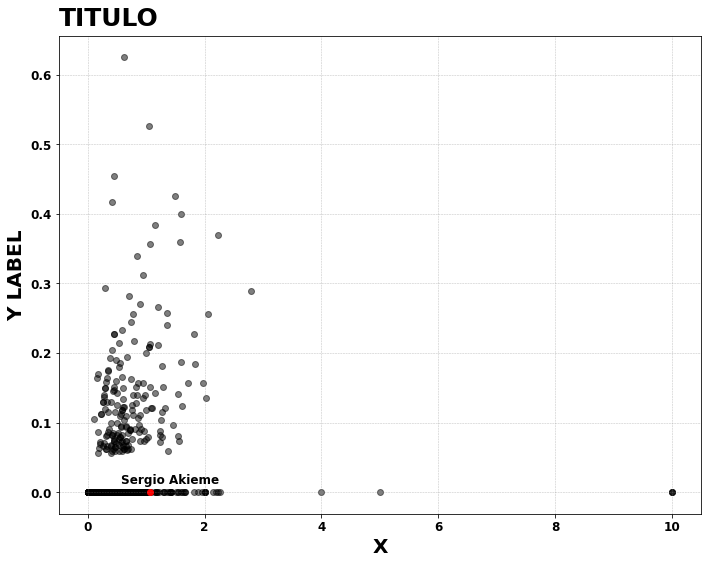

In [17]:
plot_graph(x_val.value,y_val.value,per90.value,
           games.value,player.value,positions.value,
           title.value,x_lab.value,y_lab.value,
           bgcolor.value,point_col.value,lab_col.value)